<a href="https://colab.research.google.com/github/Aless1997/Data-Set_2/blob/main/Analisi_DataSet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importiamo tutte le librerie di cui abbiamo bisogno:

In [44]:
import pandas as pd
import seaborn as sns


Andiamo ad importare il nostro Data Set

In [45]:
df = pd.read_csv('Applicant-details.csv')
df.head(10)

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0
5,76435,1161425,45,14,single,rented,no,Biomedical_Engineer,Bongaigaon,Assam,13,13,0
6,84005,7059529,63,8,single,rented,yes,Fashion_Designer,Katihar,Bihar,8,13,1
7,80918,555485,31,15,single,rented,yes,Magistrate,Sikar,Rajasthan,12,11,0
8,60768,5395461,71,10,single,rented,no,Technology_specialist,Chinsurah,West_Bengal,5,10,0
9,50075,4772948,46,17,single,rented,no,Air_traffic_controller,Muzaffarnagar,Uttar_Pradesh,11,14,1


Caricato il DataSet 'Applicant-details'. Questo set di dati fornisce approfondimenti su vari attributi dei richiedenti prestito in India, essenziali per valutare la loro idoneità all’approvazione del prestito.
Avviamo l'analisi:

In [46]:
print('Di seguito tutte le colonne estratte dal DataSet')
print()
for x in df.columns:
  print(x)

Di seguito tutte le colonne estratte dal DataSet

Applicant_ID
Annual_Income
Applicant_Age
Work_Experience
Marital_Status
House_Ownership
Vehicle_Ownership(car)
Occupation
Residence_City
Residence_State
Years_in_Current_Employment
Years_in_Current_Residence
Loan_Default_Risk


Breve spiegazione:

**Applicant_ID** --> identificatore univoco per ciascun richiedente del prestito.

**Annual_Income** --> reddito annuo del richiedente del prestito.

**Applicant_Age** --> Età del richiedente del prestito.

**Work_Experience** --> Numero di anni di esperienza lavorativa del richiedente del prestito.

**Marital_Status** --> Stato civile del richiedente il prestito.

**House_Ownership** --> Stato di proprietà della residenza del richiedente.

**Vehicle_Ownership**(car) --> stato di proprietà del veicolo del richiedente.

**Occupation** --> Professione o occupazione del richiedente del prestito.

**Residence_City** --> Città in cui risiede il richiedente del prestito.

**Residence_State** --> Stato in cui risiede il richiedente del prestito.

**Years_in_Current_Employment** --> numero di anni di lavoro attuale del candidato.

**Years_in_Current_Residence** --> numero di anni di residenza del richiedente nella residenza attuale.

**Loan_Default_Risk** --> indicatore del rischio di inadempienza del prestito, con valori che indicano se il richiedente del prestito è a rischio di inadempienza sul prestito.

Sistemiamo qualche colonna

In [47]:
df.rename(columns={'Marital_Status':'Stato_Civ'},inplace=True)
df.rename(columns={'Loan_Default_Risk':'Risk'},inplace=True)

Iniziamo l'analisi

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Stato_Civ                    100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Risk                         100000 non-null  int64 
dtypes: int64(7), ob

In [49]:
df['Stato_Civ'].describe()

count     100000
unique         2
top       single
freq       89763
Name: Stato_Civ, dtype: object

In [50]:
df['Vehicle_Ownership(car)'].describe()

count     100000
unique         2
top           no
freq       69665
Name: Vehicle_Ownership(car), dtype: object

In [51]:
df['Risk'].describe()

count    100000.000000
mean          0.129970
std           0.336272
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Risk, dtype: float64

In [52]:
df.groupby(['Risk','Stato_Civ'])['Applicant_ID'].count()

Risk  Stato_Civ
0     married       9109
      single       77894
1     married       1128
      single       11869
Name: Applicant_ID, dtype: int64

Andiamo a rappresentare in che modo i single risulterebbero più a rischio

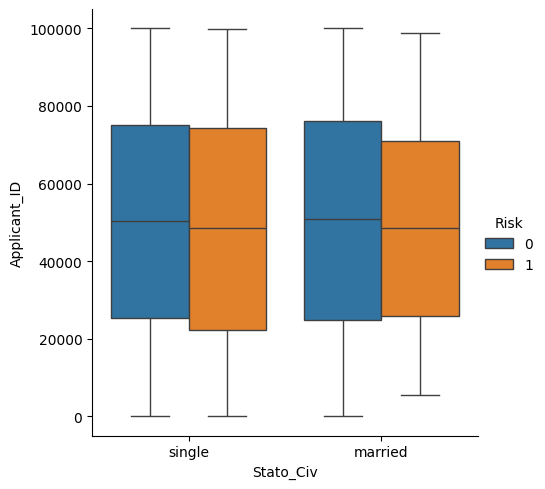

In [53]:
sns.catplot(df,x = 'Stato_Civ', y='Applicant_ID', hue='Risk',kind='box')

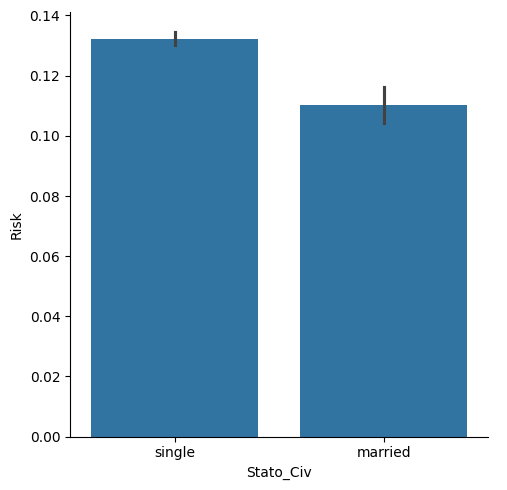

In [54]:
sns.catplot(df, x = 'Stato_Civ', y='Risk', kind='bar')

Proseguiamo l'analisi comprendendo altri parametri:

In [55]:
df.groupby(['Work_Experience'])['Applicant_Age'].mean()

Work_Experience
0     49.797260
1     49.597051
2     49.533349
3     49.678265
4     51.240959
5     49.295354
6     51.179102
7     49.834590
8     51.725756
9     48.872734
10    49.156945
11    49.826501
12    49.356863
13    49.790763
14    50.390779
15    51.053799
16    50.538877
17    49.504319
18    50.509248
19    49.627018
20    49.432215
Name: Applicant_Age, dtype: float64

In [56]:
df.groupby(['Risk','Stato_Civ'])['Applicant_Age'].mean()

Risk  Stato_Civ
0     married      50.387419
      single       50.112088
1     married      48.937943
      single       49.029236
Name: Applicant_Age, dtype: float64

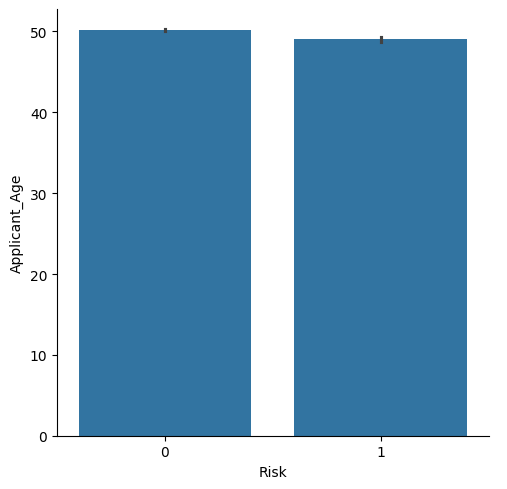

In [57]:
sns.catplot(df, x = 'Risk', y='Applicant_Age', kind='bar')

In [58]:
df.groupby(['Residence_State','Occupation'])['Years_in_Current_Employment'].mean()

Residence_State  Occupation            
Andhra_Pradesh   Air_traffic_controller    8.069182
                 Analyst                   4.667665
                 Architect                 7.516908
                 Army_officer              6.426230
                 Artist                    5.828571
                                             ...   
West_Bengal      Surveyor                  5.974359
                 Technical_writer          8.141975
                 Technician                6.311765
                 Technology_specialist     7.014815
                 Web_designer              5.918750
Name: Years_in_Current_Employment, Length: 1128, dtype: float64

Di seguito il link per accedere al file python:  \
\
Contatti:\
E-mail: alessandro.sinigaglia1997@gmail.com\
Telefono: 340 958 2184